In [119]:
#import csv, and libraries

import os
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from citipy import citipy


csvpath = os.path.join("Resources", "fatal_crashes.csv")



In [120]:
df_fatal = pd.read_csv(csvpath)
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714)
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917)
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485)
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999)
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519)


In [121]:
df_fatal["crash_date_only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.date

df_fatal["crash_time_only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.time






In [122]:
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00


In [123]:
Crash_date_split = df_fatal["Crash_Location"].str.split(expand = True)
Crash_date_split = Crash_date_split.iloc[:,[1,2,3]]
Crash_date_split.head()

,1,2,3
0,N,HALSTED,ST
1,S,RACINE,AVE
2,N,LASALLE,DR
3,N,MILWAUKEE,AVE
4,N,SHERIDAN,RD


In [124]:
df_fatal["Crash_Location"].str.extract("(\d+).*?\s+(.+)")

,0,1
0,3529,N HALSTED ST
1,7300,S RACINE AVE
2,700,N LASALLE DR
3,3800,N MILWAUKEE AVE
4,7464,N SHERIDAN RD
...,...,...
545,7600,W FOREST PRESERVE AVE
546,7600,W FOREST PRESERVE AVE
547,810,S WESTERN AVE
548,2602,S WESTERN AVE


In [125]:
df_fatal["crash_street"] = df_fatal["Crash_Location"].str.extract("(\d+).*?\s+(.+)")[1]
df_fatal

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD
...,...,...,...,...,...,...,...,...,...,...,...
545,O1336074,JF239981,5/12/2022 20:31,7600 W FOREST PRESERVE AVE,MOTORCYCLIST,-87.817078,41.949211,POINT (-87.81707837 41.94921087),2022-05-12,20:31:00,W FOREST PRESERVE AVE
546,P280573,JE493277,12/30/2021 18:26,7600 W FOREST PRESERVE AVE,PASSENGER,-87.817078,41.949211,POINT (-87.81707837 41.94921087),2021-12-30,18:26:00,W FOREST PRESERVE AVE
547,O1149865,JE317860,7/28/2021 20:49,810 S WESTERN AVE,PEDESTRIAN,-87.686301,41.870797,POINT (-87.68630098 41.87079703),2021-07-28,20:49:00,S WESTERN AVE
548,O974151,JD394588,10/10/2020 3:47,2602 S WESTERN AVE,MOTORCYCLIST,-87.685590,41.844692,POINT (-87.68559 41.844692),2020-10-10,03:47:00,S WESTERN AVE


In [126]:
df_fatal.dtypes

Person_ID           object
RD_No               object
Crash_Date          object
Crash_Location      object
Victim              object
Longitude          float64
Latitude           float64
Location            object
crash_date_only     object
crash_time_only     object
crash_street        object
dtype: object

In [127]:
df_fatal.dropna(inplace=True)
df_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 549
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_ID        537 non-null    object 
 1   RD_No            537 non-null    object 
 2   Crash_Date       537 non-null    object 
 3   Crash_Location   537 non-null    object 
 4   Victim           537 non-null    object 
 5   Longitude        537 non-null    float64
 6   Latitude         537 non-null    float64
 7   Location         537 non-null    object 
 8   crash_date_only  537 non-null    object 
 9   crash_time_only  537 non-null    object 
 10  crash_street     537 non-null    object 
dtypes: float64(2), object(9)
memory usage: 50.3+ KB


# Who is affected affected by these fatal crashes? 

In [128]:
#unique victims and counts
unique_victims = df_fatal['Victim'].unique()
unique_victims

array(['DRIVER', 'PASSENGER', 'CYCLIST', 'PEDESTRIAN', 'MOTORCYCLIST',
       'PEDESTRIAN - PENDING', 'MOTORCYLIST (MOPED)'], dtype=object)

In [129]:
#counts of victims
victim_counts = df_fatal["Victim"].value_counts()
victim_counts


PEDESTRIAN              185
DRIVER                  180
PASSENGER                87
MOTORCYCLIST             48
CYCLIST                  34
PEDESTRIAN - PENDING      2
MOTORCYLIST (MOPED)       1
Name: Victim, dtype: int64

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, 'PEDESTRIAN'),
  Text(1.0, 0, 'DRIVER'),
  Text(2.0, 0, 'PASSENGER'),
  Text(3.0, 0, 'MOTORCYCLIST'),
  Text(4.0, 0, 'CYCLIST'),
  Text(5.0, 0, 'PEDESTRIAN - PENDING'),
  Text(6.0, 0, 'MOTORCYLIST (MOPED)')])

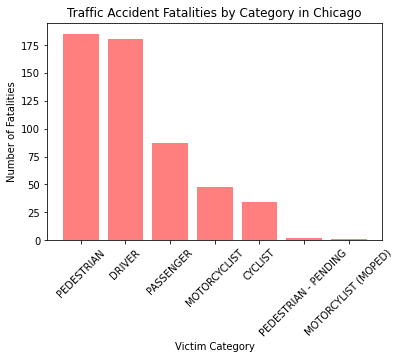

In [130]:
x_axis = ["PEDESTRIAN", "DRIVER", "PASSENGER", "MOTORCYCLIST", "CYCLIST", "PEDESTRIAN - PENDING", "MOTORCYLIST (MOPED)"]
y_axis = victim_counts

plt.bar(x_axis,y_axis, color='r', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.title("Traffic Accident Fatalities by Category in Chicago")
plt.xlabel("Victim Category")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation = 45)



# Where are these fatal crashes happening?

In [131]:


# Configure the map plot
fatal_crashes_map = df_fatal.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Victim",
#     size = [victim_counts],
    scale = 0.75,
    frame_width = 700,
    frame_height = 500,
    alpha = .5
)
# Display the map
fatal_crashes_map

c:\Users\iga70\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\iga70\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\iga70\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
c:\Users\iga70\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Victim)

# When are these fatal crashes happening?

In [132]:
#Calculate how many fatal accidents happened per month, per year

In [133]:
#Line graph with accidents by month, for each year (Pivot plot)  

In [134]:
#counts by street name 
street_counts = df_fatal["crash_street"].value_counts()

street_counts

S ASHLAND AVE       17
S PULASKI RD        12
S CICERO AVE        11
S WESTERN AVE       10
S ARCHER AVE        10
                    ..
W 95TH ST            1
STONY ISLAND AVE     1
NORTH AVE            1
N  HOMAN AVE         1
E CONGRESS PKWY      1
Name: crash_street, Length: 248, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

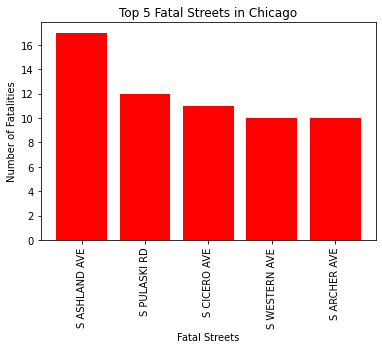

In [135]:
# Showing bar graph for top 5 most fatal streets
x_axis = ["S ASHLAND AVE", "S PULASKI RD", "S CICERO AVE", "S WESTERN AVE", "S ARCHER AVE"]
plt.bar(street_counts.index[0:5], street_counts[0:5], color = "red", align= "center")

plt.title("Top 5 Fatal Streets in Chicago")
plt.xlabel("Fatal Streets")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation = 90)

In [136]:
df_fatal["crash_street"] = df_fatal["Crash_Location"].str.extract("(\d+).*?\s+(.+)")[1]
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD


In [137]:
df_fatal["crash_date_only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.date

df_fatal["crash_time_only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.time


df_fatal["crash_month_only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.month

df_fatal["Year_Only"] = pd.to_datetime(df_fatal["Crash_Date"]).dt.year

month_list = df_fatal.set_index("crash_month_only")
month_list

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street,Year_Only
crash_month_only,,,,,,,,,,,,
7,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST,2019
7,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE,2021
3,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR,2020
11,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE,2019
3,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
5,O1336074,JF239981,5/12/2022 20:31,7600 W FOREST PRESERVE AVE,MOTORCYCLIST,-87.817078,41.949211,POINT (-87.81707837 41.94921087),2022-05-12,20:31:00,W FOREST PRESERVE AVE,2022
12,P280573,JE493277,12/30/2021 18:26,7600 W FOREST PRESERVE AVE,PASSENGER,-87.817078,41.949211,POINT (-87.81707837 41.94921087),2021-12-30,18:26:00,W FOREST PRESERVE AVE,2021
7,O1149865,JE317860,7/28/2021 20:49,810 S WESTERN AVE,PEDESTRIAN,-87.686301,41.870797,POINT (-87.68630098 41.87079703),2021-07-28,20:49:00,S WESTERN AVE,2021


In [138]:
df_2019=df_fatal.loc[df_fatal['Year_Only']==2019]

fatalties_2019=df_2019.groupby("crash_month_only")["Person_ID"].count().to_list()
fatalties_2019

[9, 4, 10, 9, 10, 14, 14, 12, 6, 10, 13, 7]

In [139]:
df_2020=df_fatal.loc[df_fatal['Year_Only']==2020]
df_2020.head()

fatalities_2020 = df_2020.groupby("crash_month_only")["Person_ID"].count().to_list()
fatalities_2020

[7, 10, 4, 10, 11, 14, 22, 9, 15, 18, 8, 17]

In [140]:
df_2021=df_fatal.loc[df_fatal['Year_Only']==2021]
df_2021.head()

fatalities_2021 = df_2021.groupby("crash_month_only")["Person_ID"].count().to_list()
fatalities_2021

[9, 4, 12, 11, 18, 16, 22, 23, 20, 11, 20, 16]

In [141]:
df_2022=df_fatal.loc[df_fatal['Year_Only']==2022]
df_2022.head()

fatalities_2022 = df_2022.groupby("crash_month_only")["Person_ID"].count().to_list()
fatalities_2022

[9, 6, 10, 9, 11, 8, 14, 12, 13]

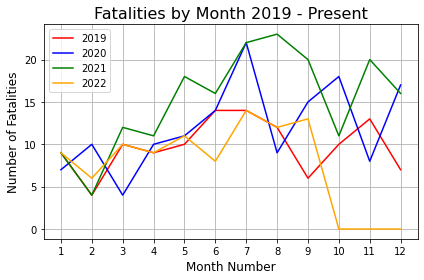

In [142]:
# Line Graph for Fatalities by Month & Year

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
y = np.arange(0, 30, 5)
line_2019 = [9, 4, 10, 9, 10, 14, 14, 12, 6, 10, 13, 7]
line_2020 = [7, 10, 4, 10, 11, 14, 22, 9, 15, 18, 8, 17]
line_2021 = [9, 4, 12, 11, 18, 16, 22, 23, 20, 11, 20, 16]
line_2022 = [9, 6, 10, 9, 11, 8, 14, 12, 13, 0, 0, 0]
fatalities_2019_plot, = plt.plot(x, line_2019, color="red", label="2019")
fatalities_2020_plot, = plt.plot(x, line_2020, color="blue", label="2020")
fatalities_2021_plot, = plt.plot(x, line_2021, color="green", label="2021")
fatalities_2022_plot, = plt.plot(x, line_2022, color="orange", label="2022")

plt.title("Fatalities by Month 2019 - Present", fontsize=16)
plt.xlabel("Month Number", fontsize = 12)
plt.ylabel("Number of Fatalities", fontsize = 12)
plt.tight_layout()

plt.legend(handles=[fatalities_2019_plot, fatalities_2020_plot, fatalities_2021_plot, fatalities_2022_plot], loc="best")

plt.grid()


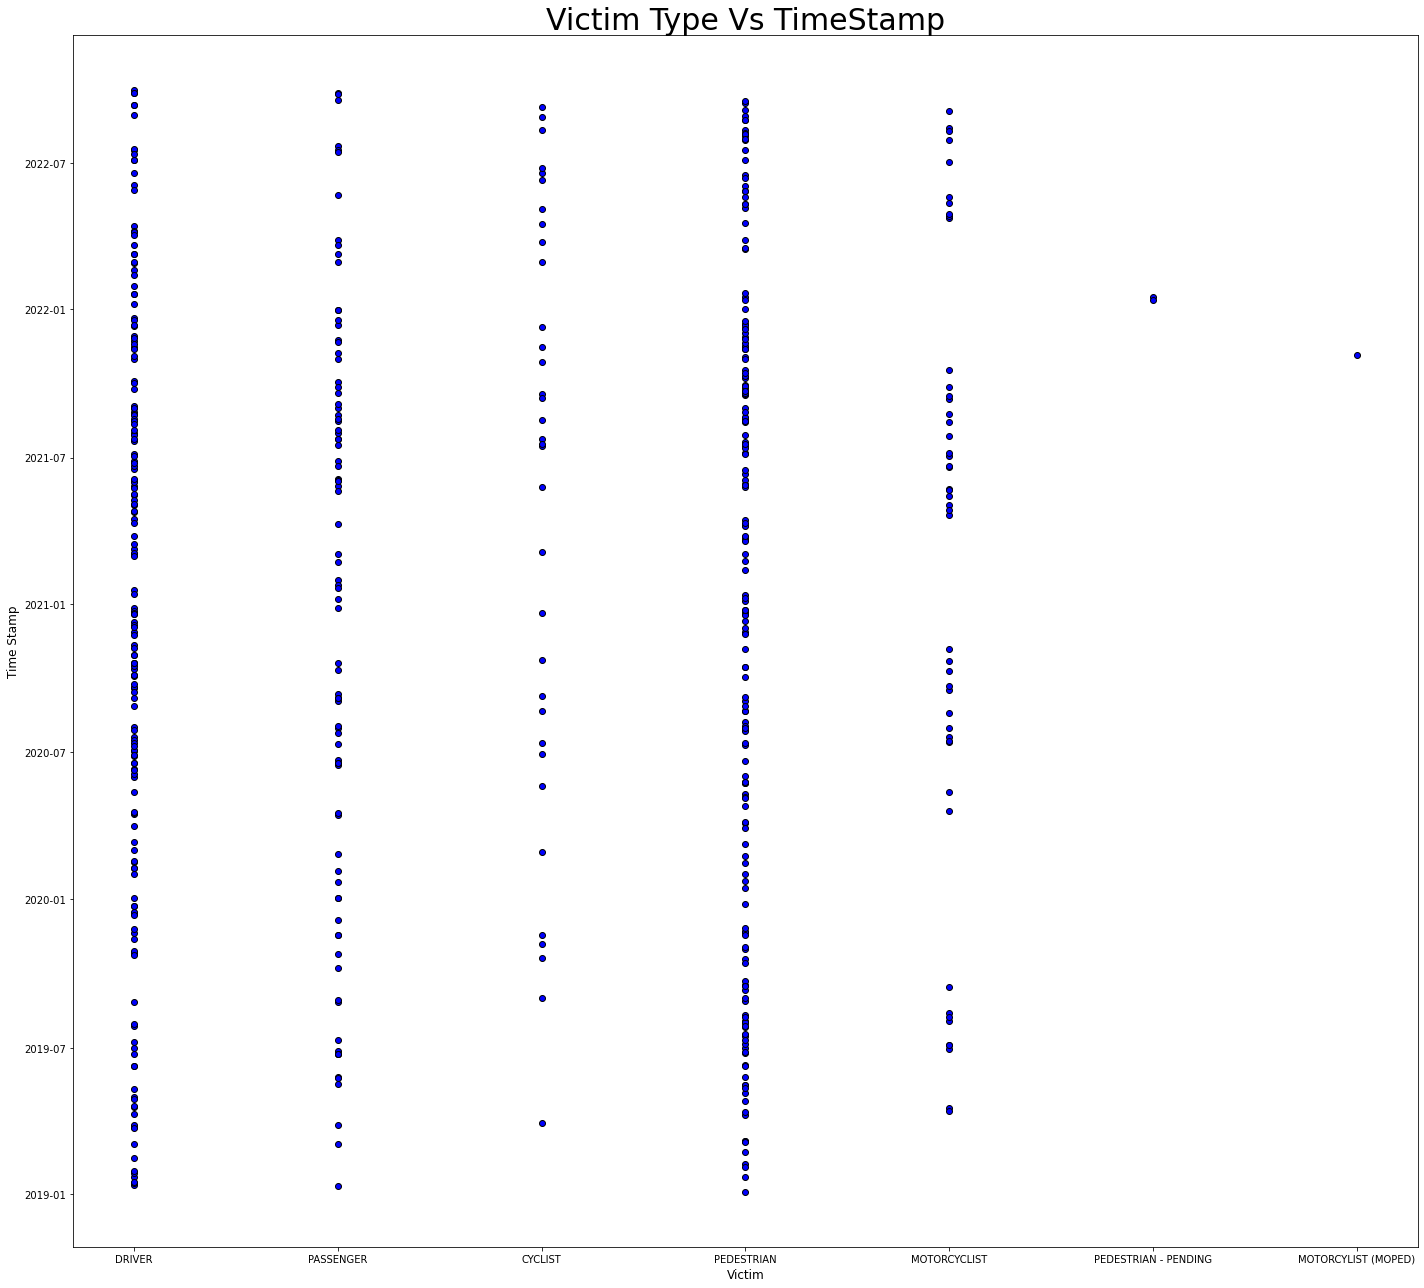

In [143]:
time_stamp = pd.to_datetime(df_fatal.Crash_Date)

time_stamp.head()

x_axis_data = df_fatal["Victim"]
y_axis_data = time_stamp
plt.figure(figsize=(20,18))
plt.scatter(x_axis_data, y_axis_data, marker=None, cmap="Victim Type Over Time", vmin=None, vmax=None, alpha=None, linewidths=None, facecolors = "blue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Victim Type Vs TimeStamp", fontsize=30)
plt.xlabel("Victim", fontsize = 12)
plt.ylabel("Time Stamp", fontsize = 12)
plt.tight_layout()

In [144]:
#make datasets by victim type...

df_fatal["TimeStamp"] =y_axis_data
df_fatal.head()

subplots_df_fatal = df_fatal.set_index("Victim")["TimeStamp"]
subplots_df_fatal.head()

driver_set = subplots_df_fatal.loc[subplots_df_fatal.index == "DRIVER"]
driver_set_mean = driver_set.mean()


passenger_set = subplots_df_fatal.loc[subplots_df_fatal.index == "PASSENGER"]
passenger_set_mean = passenger_set.mean()

cyclist_set = subplots_df_fatal.loc[subplots_df_fatal.index == "CYCLIST"]
cyclist_set_mean = cyclist_set.mean()

pedestrian_set = subplots_df_fatal.loc[subplots_df_fatal.index == "PEDESTRIAN"]
pedestrian_set_mean = pedestrian_set.mean()

motorcyclist_set = subplots_df_fatal.loc[subplots_df_fatal.index == "MOTORCYCLIST"]
motorcyclist_set_mean = motorcyclist_set.mean()




#Not including the pending values


## combine these different collections into a list
data_to_plot = [driver_set_mean, passenger_set_mean, cyclist_set_mean, pedestrian_set_mean, motorcyclist_set_mean]
print(data_to_plot)

[Timestamp('2020-12-13 08:27:31'), Timestamp('2020-12-18 22:52:35.172413696'), Timestamp('2021-05-02 07:16:05.294117632'), Timestamp('2020-12-04 20:19:18.486486272'), Timestamp('2021-02-10 14:11:31.249999872')]


In [145]:
import datetime

In [146]:
df_fatal["DT"] = pd.to_datetime(df_fatal["Crash_Date"])
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street,crash_month_only,Year_Only,TimeStamp,DT
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST,7,2019,2019-07-28 02:13:00,2019-07-28 02:13:00
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE,7,2021,2021-07-31 22:50:00,2021-07-31 22:50:00
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR,3,2020,2020-03-02 02:07:00,2020-03-02 02:07:00
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE,11,2019,2019-11-06 06:58:00,2019-11-06 06:58:00
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD,3,2022,2022-03-24 22:06:00,2022-03-24 22:06:00


In [147]:
df_fatal["Hour"] = df_fatal["DT"].dt.hour
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street,crash_month_only,Year_Only,TimeStamp,DT,Hour
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST,7,2019,2019-07-28 02:13:00,2019-07-28 02:13:00,2
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE,7,2021,2021-07-31 22:50:00,2021-07-31 22:50:00,22
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR,3,2020,2020-03-02 02:07:00,2020-03-02 02:07:00,2
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE,11,2019,2019-11-06 06:58:00,2019-11-06 06:58:00,6
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD,3,2022,2022-03-24 22:06:00,2022-03-24 22:06:00,22


In [148]:
# Create the categories
group_names = ["Late", "Morning", "Afternoon", "Night"]

# Create the bins based on time of day 
bins = [0, 6, 12, 18, 24]
df_fatal["Time of Day"] = pd.cut(df_fatal["Hour"], bins, labels=group_names, include_lowest=True)
df_fatal.head()

,Person_ID,RD_No,Crash_Date,Crash_Location,Victim,Longitude,Latitude,Location,crash_date_only,crash_time_only,crash_street,crash_month_only,Year_Only,TimeStamp,DT,Hour,Time of Day
0,O699223,JC353600,7/28/2019 2:13,3529 N HALSTED ST,DRIVER,-87.649308,41.946327,POINT (-87.64930836 41.94632714),2019-07-28,02:13:00,N HALSTED ST,7,2019,2019-07-28 02:13:00,2019-07-28 02:13:00,2,Late
1,P258673,JE321561,7/31/2021 22:50,7300 S RACINE AVE,PASSENGER,-87.654166,41.761369,POINT (-87.65416583 41.76136917),2021-07-31,22:50:00,S RACINE AVE,7,2021,2021-07-31 22:50:00,2021-07-31 22:50:00,22,Night
2,O853602,JD170887,3/2/2020 2:07,700 N LASALLE DR,DRIVER,-87.632820,41.894850,POINT (-87.63282 41.89485),2020-03-02,02:07:00,N LASALLE DR,3,2020,2020-03-02 02:07:00,2020-03-02 02:07:00,2,Late
3,O775752,JC500358,11/6/2019 6:58,3800 N MILWAUKEE AVE,CYCLIST,-87.741950,41.949990,POINT (-87.74195 41.94999),2019-11-06,06:58:00,N MILWAUKEE AVE,11,2019,2019-11-06 06:58:00,2019-11-06 06:58:00,6,Late
4,O1304767,JF185594,3/24/2022 22:06,7464 N SHERIDAN RD,CYCLIST,-87.665839,42.018075,POINT (-87.66583922 42.01807519),2022-03-24,22:06:00,N SHERIDAN RD,3,2022,2022-03-24 22:06:00,2022-03-24 22:06:00,22,Night


In [149]:
late_fatalities = df_fatal.loc[df_fatal["Time of Day"] == "Late"]
morning_fatalities = df_fatal.loc[df_fatal["Time of Day"] == "Morning"]
afternoon_fatalities = df_fatal.loc[df_fatal["Time of Day"] == "Afternoon"]
night_fatalities = df_fatal.loc[df_fatal["Time of Day"] == "Night"]
print(f"Late: {len(late_fatalities)}")
print(f"Morning: {len(morning_fatalities)}")
print(f"Afternoon: {len(afternoon_fatalities)}")
print(f"Night: {len(night_fatalities)}")

Late: 162
Morning: 92
Afternoon: 108
Night: 175


30 17 20 33


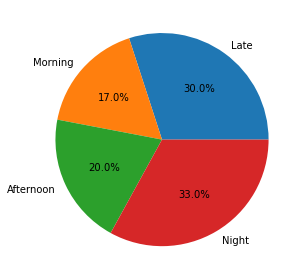

In [150]:
#Labels
times_of_day = "Late", "Morning", "Afternoon", "Night"

#percentages
total_fatalities = len(df_fatal)
percentage_late = round((len(late_fatalities) / total_fatalities)*100)
percentage_morning = round((len(morning_fatalities) / total_fatalities)*100)
percentage_afternoon = round((len(afternoon_fatalities) / total_fatalities)*100)
percentage_night = round((len(night_fatalities) / total_fatalities)*100)

print(percentage_late, percentage_morning, percentage_afternoon, percentage_night)

sizes = [percentage_late, percentage_morning, percentage_afternoon, percentage_night]
plt.pie(sizes, labels = times_of_day,  autopct='%1.1f%%',)
plt.tight_layout()

In [151]:
#How does victim type divide
plt_TOD_for_bar = df_fatal.groupby("Time of Day")["Victim"]
#plt_TOD_for_bar.head()

y_newplt = plt_TOD_for_bar.value_counts()
#print(y_newplt)
y_newplt

Time of Day  Victim              
Late         DRIVER                  77
             PEDESTRIAN              36
             PASSENGER               30
             MOTORCYCLIST            10
             CYCLIST                  9
Morning      PEDESTRIAN              37
             DRIVER                  31
             PASSENGER               11
             CYCLIST                  9
             MOTORCYCLIST             4
Afternoon    PEDESTRIAN              50
             DRIVER                  19
             MOTORCYCLIST            14
             PASSENGER               14
             CYCLIST                  9
             MOTORCYLIST (MOPED)      1
             PEDESTRIAN - PENDING     1
Night        PEDESTRIAN              62
             DRIVER                  53
             PASSENGER               32
             MOTORCYCLIST            20
             CYCLIST                  7
             PEDESTRIAN - PENDING     1
Name: Victim, dtype: int64

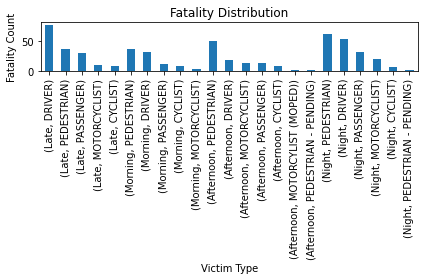

In [152]:
as_series = pd.Series(y_newplt)
seriesplt = as_series.plot(kind='bar')
seriesplt.set_ylabel("Fatality Count")
seriesplt.set_xlabel("Victim Type")
seriesplt.set_title("Fatality Distribution")

plt.tight_layout()